## 梯度下降

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# points = np.genfromtxt("linear.txt", delimiter=",")

# # Plot the points
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.plot(points[:,0], points[:,1], 'go', linewidth=2)

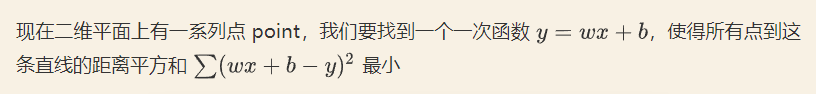

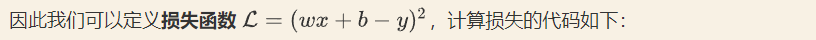

In [2]:
# Compute loss.
def compute_error(b, w, points):
    total_error = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (w * x + b)) ** 2
    return total_error / float(len(points))  # average

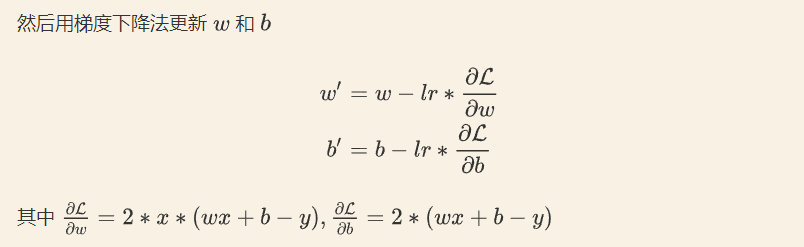

In [3]:
# Compute gradient.
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += 2 * ((w_current * x) + b_current - y)
        w_gradient += 2 * x * ((w_current * x) + b_current - y)
    b_gradient = b_gradient / N
    w_gradient = w_gradient / N
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

In [4]:
# 不断更新b和w
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations): # num_iteration 迭代次数
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]

Starting gradient descent at b = 0.17216997087194708, w = 0.9467179642159356, error = 810.6610471883815
Running...
After 1000 iterations at b = 0.24128549253984585, w = 1.4747497125519011, error = 112.52478592513906


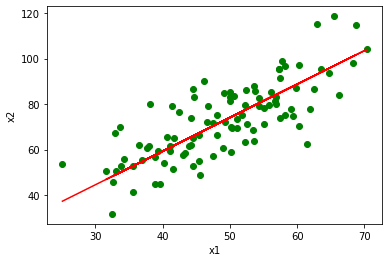

In [5]:
def run_grad():
    points = np.genfromtxt("linear.txt", delimiter=",")
    learning_rate = 0.0001
    initial_b = random.random()
    initial_w = random.random()
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w, compute_error(initial_b, initial_w, points)))
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations at b = {1}, w = {2}, error = {3}"
          .format(num_iterations, b, w, compute_error(b, w, points)))
    
    # Plot the decision boundary.
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(points[:,0], points[:,1], 'go', linewidth=2)
    plt.plot(points[:,0], points[:,0] * w + b, 'r', linewidth=1.5)
run_grad()

## 最小二乘

[1.32243102 7.99102098]
w is :1.32243102275536, and b is :7.991020982270358


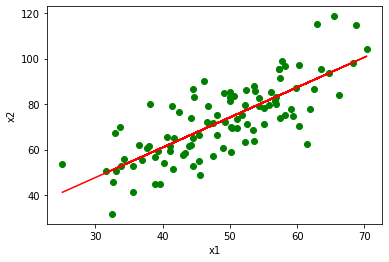

In [7]:
def run_lstq():
    points = np.genfromtxt("linear.txt", delimiter=",")
    
    A = np.vstack([points[:,0],np.ones(points.shape[0])]).T
    param = np.linalg.lstsq(A, points[:,1], rcond=None)[0]  # lstsq的输出包括四部分：回归系数、残差平方和、自变量X的秩、X的奇异值。
    w, b = param[0], param[1]
    print(param)
    print('w is :{}, and b is :{}'.format(w, b))

    # Plot the decision boundary.
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.plot(points[:,0], points[:,1], 'go', linewidth=2)
    plt.plot(points[:,0], points[:,0] * w + b, 'r', linewidth=1.5)
run_lstq()